# Short beam Quantum Radiation Reaction - Photon Spectrum

In [1]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *
from scipy.integrate import odeint

In [2]:
# parameters
# laser
lbd = 0.8; #[\mu m]
a0 = 12 #[]
W0 = 2.4; #[\mu m]
zR = pi*W0**2/lbd; #[\mu m]
# beam
g0 = 5000; #[]
R = W0; #[\mu m]
lonrise = 50 #[1/wp]

In [3]:
a0lst = np.arange(0.2,12.1,0.2)
enelst = np.linspace(1,g0,100)

# PW Photons spectra
#    get PW files and sort
files = glob.glob('PW/a*RAW-photons-000103.h5')
files.sort()
enedist_photons = np.zeros((len(files),len(enelst)-1))
#    for each file, get the spectrum
for i in range(len(files)):
    filef = h5py.File(files[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_photons[i,:] = enedist_sim_y1

# compute "theory" model
y_th = np.zeros((len(files),len(enedist_sim_x)))
for i in trange(len(files)):
    y_th[i,:] = photon_spectrum(enedist_sim_x,g0,a0lst[i], 21.235)

100%|███████████████████████████████████████████| 60/60 [04:17<00:00,  4.29s/it]


In [4]:
# 3D photons

tau = 21.235 # change this

file0 = h5py.File('Gaussian/RW0_03_RAW-photons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW03 = enedist[qdist>0]
qdist_RW03 = np.abs( qdist[qdist>0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW03,enelst,weights=qdist_RW03)
enedist_y_RW03, enedist_x_RW03 = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0/3
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in trange(len(files)):
    dNdg = dNdg + dNda[i] * y_th[i,:]
dNdg_RW03 = dNdg/np.sum(dNda)
#
file0 = h5py.File('Gaussian/RW0_10_RAW-photons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW10 = enedist[qdist>0]
qdist_RW10 = np.abs( qdist[qdist>0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW10,enelst,weights=qdist_RW10)
enedist_y_RW10, enedist_x_RW10 = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in trange(len(files)):
    #dNdg = dNdg + dNda[i] * enedist_photons[i,:]
    dNdg = dNdg + dNda[i] * y_th[i,:]
dNdg_RW10 = dNdg/np.sum(dNda)
#
file0 = h5py.File('Gaussian/RW0_30_RAW-photons-000600.h5', 'r')
enedist = np.array(file0['ene'])
qdist = np.array(file0['q'])
enedist_RW30 = enedist[qdist>0]
qdist_RW30 = np.abs( qdist[qdist>0] )
enedist_ytmp, enedist_xtmp = np.histogram(enedist_RW30,enelst,weights=qdist_RW30)
enedist_y_RW30, enedist_x_RW30 = enedist_ytmp, arraycenter(enedist_xtmp)
# integrating PW results to reconstruct Gaussian
R = W0*3
dNda = (W0/R)**2/a0lst * (a0lst/np.max(a0lst))**((W0/R)**2)
dNdg = np.zeros_like(enedist_photons[0])
for i in trange(len(files)):
    #dNdg = dNdg + dNda[i] * enedist_photons[i,:]
    dNdg = dNdg + dNda[i] * y_th[i,:]
dNdg_RW30 = dNdg/np.sum(dNda)

100%|███████████████████████████████████████| 60/60 [00:00<00:00, 112750.11it/s]


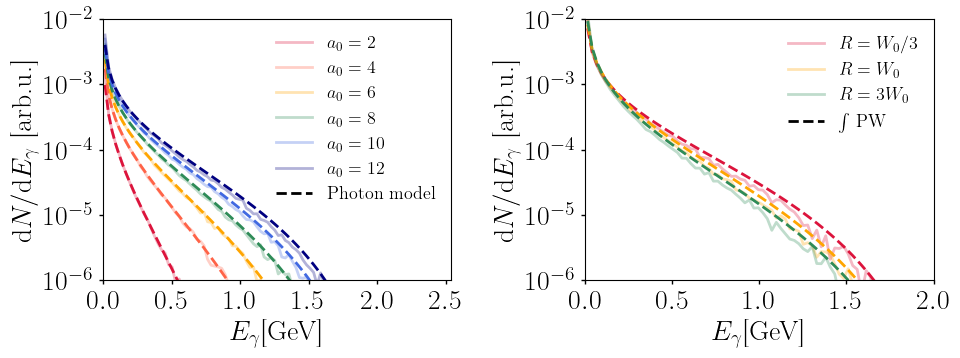

In [6]:
# PW photons 
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# plot osiris data
alp = 0.3
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[9,:], label=r'$a_0=2$', alpha=alp)
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[19,:], label=r'$a_0=4$', alpha=alp)
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[29,:], label=r'$a_0=6$', alpha=alp)
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[39,:], label=r'$a_0=8$', alpha=alp)
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[49,:], label=r'$a_0=10$', alpha=alp)
axes[0].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_photons[59,:], label=r'$a_0=12$', alpha=alp)

# plot theory/numerics for photon spectrum
# ghost line for legend
indx = 2; y = y_th[0,:]; axes[0].plot(1e-9*0.511e6*enedist_sim_x[:-20], 1e-16*y[:-20] * enedist_photons[9,indx]/y[indx], 'k--', label=r'Photon model', zorder=-1)
indxtrp=0
yref = enedist_photons[9,indx]/y_th[9,:][indx]
for indx2 in [9, 19, 29, 39, 49, 59]:
    axes[0].plot(1e-9*0.511e6*enedist_sim_x[:-20], y_th[indx2,:][:-20] * yref, '--')

axes[0].set_yscale('log')
axes[0].set_xlabel(r'$E_\gamma$[GeV]')
axes[0].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_\gamma$ [arb.u.]')
#axes[0].title(r'PW: $\gamma_e=5000, \lambda=0.8\mu\mathrm{m}, \tau_\mathrm{rise} = 50\omega_p^{-1} $')
axes[1].set_xlim([0,2.6])
axes[0].set_xticks([0,0.5,1,1.5,2,2.5])
axes[0].set_ylim([1e-6,1e-2])
axes[0].set_yticks([1e-6,1e-5,1e-4,1e-3,1e-2])
axes[0].legend(loc='upper right', frameon=False, prop={'size': 13})

axes[1].plot(enedist_x_RW03*(0.511e6)*1e-9, enedist_y_RW03/np.trapz(enedist_y_RW03,enedist_x_RW03), color='crimson', label=r'$R=W_0/3$', alpha=alp)
axes[1].plot(enedist_x_RW03*(0.511e6)*1e-9, dNdg_RW03/np.trapz(dNdg_RW03,enedist_x_RW03), '--', color='crimson')
axes[1].plot(enedist_x_RW10*(0.511e6)*1e-9, enedist_y_RW10/np.trapz(enedist_y_RW10,enedist_x_RW10), color='orange', label=r'$R=W_0$', alpha=alp)
axes[1].plot(enedist_x_RW10*(0.511e6)*1e-9, dNdg_RW10/np.trapz(dNdg_RW10,enedist_x_RW10), '--', color='orange')
axes[1].plot(enedist_x_RW30*(0.511e6)*1e-9, enedist_y_RW30/np.trapz(enedist_y_RW30,enedist_x_RW30), color='seagreen', label=r'$R=3W_0$', alpha=alp)
axes[1].plot(enedist_x_RW30*(0.511e6)*1e-9, dNdg_RW30/np.trapz(dNdg_RW30,enedist_x_RW30), '--', color='seagreen')
axes[1].plot(enedist_x_RW03*(0.511e6)*1e-9, 1e-16*dNdg_RW03/np.trapz(dNdg_RW03,enedist_x_RW03), 'k--', zorder=-1, label=r'$\int$ PW')
axes[1].set_yscale('log')
axes[1].set_xlabel(r'$E_\gamma$[GeV]')
axes[1].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_\gamma$ [arb.u.]')
#axes[2].title(r'Gaussian LP: $\gamma_e=5000, \lambda=0.8~\mu\mathrm{m} \newline a_0=12, \tau_\mathrm{rise}=50 ~\omega_p^{-1},\Delta_\bot=0 ~R$')
axes[1].set_xticks([0,0.5,1,1.5,2,2.5])
axes[1].set_xlim([0,2])
axes[1].set_ylim([1e-6,1e-2])
axes[1].set_yticks([1e-6, 1e-5,1e-4,1e-3,1e-2])
axes[1].legend(loc='upper right', frameon=False, prop={'size': 13})

# aspect
for i in range(2):
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    #axesratio = (ymax-ymin)/(xmax-xmin)
    axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
    axes[i].set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
plt.savefig('GaussianQRR_photonModel.pdf',transparent=True)
plt.show()